<a href="https://colab.research.google.com/github/Mosesomo/Data_Science/blob/master/randomForester_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest MSE: 31.859230951807227, R2 Score: 0.81009013191504
Decision Tree MSE: 53.89337349397591, R2 Score: 0.6787466883184802


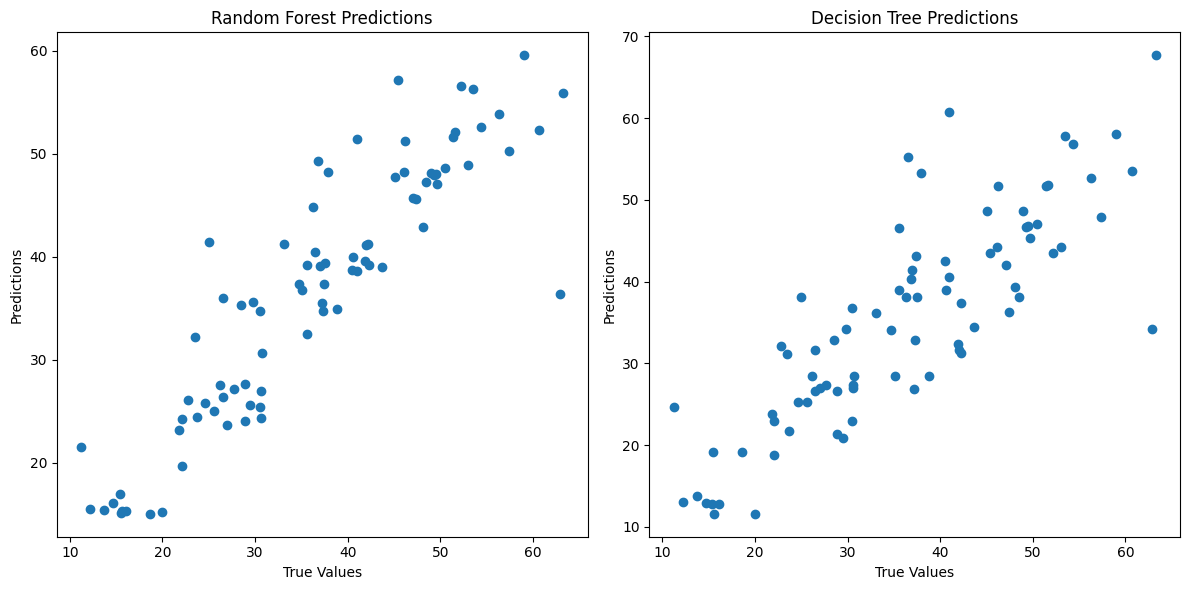

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
data = pd.read_csv('/content/estate.csv')

data.columns = ['No', 'X1 transaction date',
                'X2 house age', 'X3 distance to the nearest MRT station',
                'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
                'Y house price of unit area']


# Split the data into features (X) and target (y)
X = data.drop('Y house price of unit area', axis=1)
y = data['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(random_state=42)

# Train the models
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Make predictions
rf_predictions = rf.predict(X_test)
dt_predictions = dt.predict(X_test)

# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)

rf_r2 = r2_score(y_test, rf_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"Random Forest MSE: {rf_mse}, R2 Score: {rf_r2}")
print(f"Decision Tree MSE: {dt_mse}, R2 Score: {dt_r2}")

# Plot the true vs predicted prices for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Predictions')

plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Predictions')

plt.tight_layout()
plt.show()

